In [11]:
# import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

colors = np.array([
    (0, 0, 0),
    (197, 0, 43),
    (102,0,102), #(51, 255, 249),
    (206, 245, 0),
    (255, 0, 244),
    (0, 254, 91),
    (254, 91, 0),
    (39,0,245),
    (255, 255, 255), #(0, 255, 244),
])

In [12]:
from netarch.conv_unet import Conv_Unet
from netarch.lstm_unet import LSTM_Unet
from netarch.regerssion_conv_net import Regression_Conv_Unet

from netarch.loss import bce_dice_loss
from netarch.train import train_model

In [13]:
def draw_labels_on_image(image, labels):
    rgb_image = np.repeat(np.array(image), repeats=3, axis=2)
    for color_idx, layer in zip(np.arange(1, labels.shape[0] + 1), labels):
        rgb_image[layer, np.arange(image.shape[1])] = colors[color_idx]
        rgb_image[layer-1, np.arange(image.shape[1])] = colors[color_idx]

    return rgb_image

def one_hot_label_to_border(label, nclasses):
    nominal_encoded = label.argmax(axis=-1)
    return np.array([
        np.argmax(nominal_encoded == n, axis=0)
        for n in np.arange(1, nclasses + 1)
    ])

def map_layers_to_contrasting_colors(label):
    return np.array([
        colors[row]
        for row in label
    ])

In [28]:
np.save('./data/images.npy', images.astype(np.int8))
np.save('./data/labels_onehot.npy', labels.astype(np.int1))

AttributeError: module 'numpy' has no attribute 'int1'

In [27]:
np.save('./data/labels_sigmoid.npy', a.astype(np.float16))

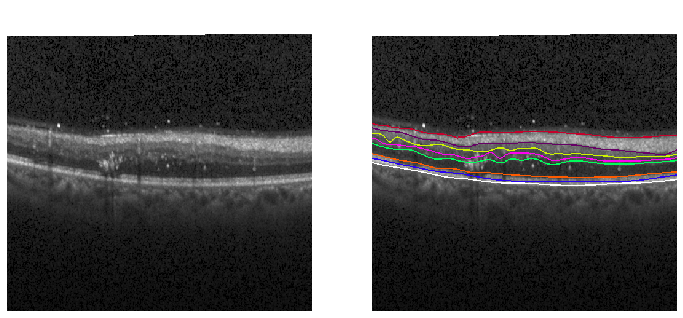

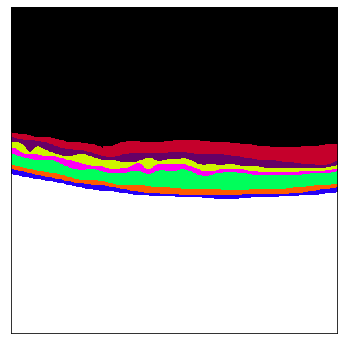

In [14]:

images = np.load('./data/images.npy')
images = images.reshape(images.shape + (1, ))
labels = np.load('./data/labels_onehot.npy')




fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(images[0].max(axis=-1), cmap='gray')
axes[1].imshow(draw_labels_on_image(images[0], one_hot_label_to_border(labels[0], 8)))
# axes[2].imshow(map_layers_to_contrasting_colors(labels[0]))

axes[0].axis('off')
axes[1].axis('off')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.imshow(map_layers_to_contrasting_colors(labels[0].argmax(axis=-1)))
axes.get_xaxis().set_ticks([])
axes.get_yaxis().set_ticks([])
plt.show()


In [ ]:
baseline = Conv_Unet()
renet = LSTM_Unet()
regression = Regression_Conv_Unet()

baseline.load_weights('./saved_weights/unet/weights-400.hdf5')
renet.load_weights('./saved_weights/renet/weights-400.hdf5')
regression.load_weights('./saved_weights/regunet/weights-330.hdf5')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images.astype(np.float16),
    labels,
    test_size=0.1,
    random_state=42
)

In [ ]:
def cast_sigmoid_results_to_class(sigmoidal_results):
    return (
        np.minimum(
            np.maximum(sigmoidal_results - 0.05, 0),
            0.9,
        )  * 80 / 9
    ).astype(int)



In [ ]:

for data, correct_labeling, _ in zip(X_train, y_train, range(4,8)):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
#     axes[0].imshow(data.max(axis=-1).astype(int))
    axes[0].imshow(map_layers_to_contrasting_colors(
        correct_labeling.argmax(axis=-1)
    ))
    axes[1].imshow(map_layers_to_contrasting_colors(
        baseline.predict(data.reshape((1, ) + data.shape))[0].argmax(axis=-1)
    ))
    axes[2].imshow(map_layers_to_contrasting_colors(
        cast_sigmoid_results_to_class(
            regression.predict(data.reshape((1, ) + data.shape))[0].max(axis=-1)
        )
    ))
    axes[3].imshow(map_layers_to_contrasting_colors(
        renet.predict(data.reshape((1, ) + data.shape))[0].argmax(axis=-1)
    ))
    plt.show()

In [ ]:

for data, correct_labeling, _ in zip(X_test, y_test, range(0, 10)):
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
#     axes[0].imshow(data.max(axis=-1).astype(int))
    axes[0].imshow(map_layers_to_contrasting_colors(
        correct_labeling.argmax(axis=-1)
    ))
    axes[1].imshow(map_layers_to_contrasting_colors(
        baseline.predict(data.reshape((1, ) + data.shape))[0].argmax(axis=-1)
    ))
    axes[2].imshow(map_layers_to_contrasting_colors(
        cast_sigmoid_results_to_class(
            regression.predict(data.reshape((1, ) + data.shape))[0].max(axis=-1)
        )
    ))
    axes[3].imshow(map_layers_to_contrasting_colors(
        renet.predict(data.reshape((1, ) + data.shape))[0].argmax(axis=-1)
    ))
    plt.show()